# Topics in Quantitative Finance, Summer 2023 

## Lecture 4: The Black-Merton-Scholes model and beyond II

<br>
<br>

<center>
<font size=5, color=darkblue> Tai-Ho Wang (王 太和)</font>
</center>
<br>
<center>
<h2><img src="https://lehman.edu/techincubator/img/baruch-logo.png" align="center" height=100 width=275></h2>
<br>

$$
\newcommand{\bea}{\begin{eqnarray}}
\newcommand{\eea}{\end{eqnarray}}
\newcommand{\supp}{\mathrm{supp}}
\newcommand{\F}{\mathcal{F} }
\newcommand{\cF}{\mathcal{F} }
\newcommand{\E}{\mathbb{E} }
\newcommand{\Eof}[1]{\mathbb{E}\left[ #1 \right]}
\newcommand{\Etof}[1]{\mathbb{E}_t\left[ #1 \right]}
\newcommand{\Sdof}[1]{\mathbb{Sd}\left[ #1 \right]}
\def\Cov{{ \mbox{Cov} }}
\def\Var{{ \mbox{Var} }}
\newcommand{\1}{\mathbf{1} }
\newcommand{\p}{\partial}
\newcommand{\PP}{\mathbb{P} }
\newcommand{\Pof}[1]{\mathbb{P}\left[ #1 \right]}
\newcommand{\QQ}{\mathbb{Q} }
\newcommand{\R}{\mathbb{R} }
\newcommand{\DD}{\mathbb{D} }
\newcommand{\HH}{\mathbb{H} }
\newcommand{\spn}{\mathrm{span} }
\newcommand{\cov}{\mathrm{cov} }
\newcommand{\HS}{\mathcal{L}_{\mathrm{HS}} }
\newcommand{\Hess}{\mathrm{Hess} }
\newcommand{\trace}{\mathrm{trace} }
\newcommand{\LL}{\mathcal{L} }
\newcommand{\s}{\mathcal{S} }
\newcommand{\ee}{\mathcal{E} }
\newcommand{\ff}{\mathcal{F} }
\newcommand{\hh}{\mathcal{H} }
\newcommand{\bb}{\mathcal{B} }
\newcommand{\dd}{\mathcal{D} }
\newcommand{\g}{\mathcal{G} }
\newcommand{\half}{\frac{1}{2} }
\newcommand{\T}{\mathcal{T} }
\newcommand{\bit}{\begin{itemize}}
\newcommand{\eit}{\end{itemize}}
\newcommand{\beq}{\begin{equation}}
\newcommand{\eeq}{\end{equation}}
\newcommand{\tr}{\mbox{tr}}
\newcommand{\inn}[2]{\left\langle #1, #2 \right\rangle}
\newcommand{\bX}{\boldsymbol X}
\newcommand{\bY}{\boldsymbol Y}
\newcommand{\bSigma}{\boldsymbol \Sigma}
\newcommand{\bm}{\boldsymbol m}
\newcommand{\bx}{\boldsymbol x}
\newcommand{\by}{\boldsymbol y}
\newcommand{\bepsilon}{\boldsymbol\epsilon}
\newcommand{\bmu}{\boldsymbol\mu}
\newcommand{\bxi}{\boldsymbol\xi}
$$



## Agenda

- Black-Merton-Scholes model revisited
- Implied volatility
    - Gaussian process regression (GPR) fit for implied volatility curve
- Local volatility model
- Stochastic volatility model
    - Heston models

## The Black-Scholes world

The Black–Scholes model assumes that the market consists of at least one risky asset, usually called the stock, and one riskless asset, usually called the money market, cash, or bond.

Assumptions on the assets:

- (riskless rate) The rate of return on the riskless asset is constant and thus called the risk-free interest rate.
- (Brownian motion) The instantaneous log return of stock price is a Brownian motion with drift; and we will assume its drift and volatility are constant (if they are time-varying, we can deduce a suitably modified Black–Scholes formula quite simply, as long as the volatility is not random). As a result, the stock price follows a geometric Brownian motion. 
- The stock does not pay dividend.

Assumptions on the market:

- There exists no arbitrage opportunity.
- It is possible to borrow and lend any amount, even fractional, of cash at the riskless rate.
- It is possible to buy and sell any amount, even fractional, of the stock, including short selling.
- Frictionless market: the transactions do not incur any fees or costs.


## Black-Scholes model

Assume the price of the underlying asset follows the stochastic differential equation

$$
\frac{dS_t}{S_t} = \mu dt + \sigma dW_t,
$$

where

- $\mu$: (constant) expected return 
- $\sigma$: (constant) volatility 
- $W_t$: standard Brownian motion

For each time $t$, $S_t$ is lognormally distributed. More precisely,

$$
S_t \sim S_0 \exp\left[\left(\mu - \frac{\sigma^2}{2}\right)t + \sigma \sqrt t Z \right]
$$

where $Z$ is a standard normal random variable.

#### Note
$S_t$ has the closed form expression

$$
S_t = S_0 e^{\left(\mu - \frac{\sigma^2}2 \right) t+ \sigma W_t}
$$

and is also referred to as a *geometric Brownian motion*.

## Black-Scholes PDE

We conclude that the price $C$ of a call option satisfies

\begin{eqnarray*}
   \frac{\p C}{\p t} + \frac{\sigma^2}{2}S^2\frac{\p C^2}{\p S^2} + rS\frac{\p C}{\p S} - rC = 0,
   \mbox{ for } 0 < S < \infty, \quad 0 \leq t < T
\end{eqnarray*}

with terminal condition

$$
C(T,S) = (S - K)^+
$$

and boundary conditions

\begin{eqnarray*}
   && C(t,0) = 0  \\
   && C(t,S) \sim S - K e^{-r(T - t)} \mbox{ as } S \to\infty \\
   && \mbox{ or more specificly} \lim_{S\to\infty} \frac{C(t, S)}S = 1 
\end{eqnarray*}

#### Note
The Black-Scholes pricing PDE does not depend on the drift $\mu$.

## The Black-Scholes formula 

For call

$$
C = S e^{-d\tau} N(d_1) - K e^{-r\tau} N(d_2)
$$

where $\tau$ is time to expiry, $N(\cdot)$ denotes the cdf for standard normal, and 

$$
d_1 = \frac{\log\left(\frac{Se^{-d\tau}}{Ke^{-r\tau}}\right)}{\sigma\sqrt\tau}+ \frac{\sigma\sqrt\tau}2, \qquad d_2 = d_1 - \sigma \sqrt\tau
$$

For put

$$
P = K e^{-r\tau} N(-d_2) - S e^{-d\tau} N(-d_1).
$$

### Note
- Put-call parity

    $$
    C - P = S e^{-d\tau} - K e^{-r\tau}.
    $$
    
- Financial meaning of $N(d_1)$ and $N(d_2)$

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from numpy import exp, log, sqrt
from scipy.stats import norm

In [22]:
# Black-Scholes formulas
# call
def bs_call(s, K, sigma, t, r=0, d=0):
    d1 = (log(s/K) + (r - d)*t)/(sigma*sqrt(t)) + sigma*sqrt(t)/2
    d2 = d1 - sigma*sqrt(t)
    
    c = s*exp(-d*t)*norm.cdf(d1) - K*exp(-r*t)*norm.cdf(d2)
    delta = exp(-d*t)*norm.cdf(d1)
    gamma = exp(-d*t)*norm.pdf(d1)/s/sigma/sqrt(t)
    
    return {'c': c, 'delta': delta, 'gamma': gamma}

# put
def bs_put(s, K, sigma, t, r=0, d=0):
    d1 = (log(s/K) + (r - d)*t)/(sigma*sqrt(t)) + sigma*sqrt(t)/2
    d2 = d1 - sigma*sqrt(t)
    
    p = K*exp(-r*t)*norm.cdf(-d2) - s*exp(-d*t)*norm.cdf(-d1)
    delta = -exp(-d*t)*norm.cdf(-d1)
    gamma = exp(-d*t)*norm.pdf(d1)/s/sigma/sqrt(t)
    
    return {'p': p, 'delta': delta, 'gamma': gamma}

In [23]:
bs_call(100,101, 0.3, 1), bs_put(100,101, 0.3, 1)['p']

({'c': 11.489697553016399,
  'delta': 0.5465034987964444,
  'gamma': 0.013207627175872894},
 12.489697553016399)

## Implied volatility

"A wrong number to a wrong formula for a correct answer."

- In the Black-Scholes model there is a one-to-one correspondence between the price of the option and the volatility parameter $\sigma$ (Why?). The option prices are often quoted by stating this specific volatility, called the *implied volatility*.

- In Black-Scholes world, the volatility is assumed constant. But in reality, options of different strike require different volatilities to match their market prices. This is referred to as the *volatility smile*.

## Volatility smile of SPX on Sep-15, 2011

<img src="spxImpVol.jpg" align = "center" height=600 width=600>


## Gaussian process revisited

A stochastic "process" $f_\bx$, (multi-)indexed by $\bx\in\R^d$, is called a *Gaussian process* if all its finite dimensional distributions are jointly Gaussian. Precisely, given any finite set of (multi-)indices $\bx_1, \cdots, \bx_n$, the random variables $f_{\bx_1}, \cdots, f_{\bx_n}$ are jointly Gaussian. As a result, the distribution of a Gaussian process is fully characterized by the mean function $m(\bx)$ and the autocovariance function, a.k.a., the *kernel*, $k(\bx, \by)$. For example, the $n$-dimensional random vector $(f_{\bx_1}, \cdots, f_{\bx_n})$ is multivariate normally distribtuted $N(\bmu, \bSigma)$ with

$$
\bmu = \left[\begin{array}{c}
m(\bx_1) \\
\vdots \\
m(\bx_n)
\end{array}\right], \qquad 
\bSigma = \left[\begin{array}{ccc}
k(\bx_1, \bx_1) & \cdots & k(\bx_1, \bx_n) \\
\vdots & \ddots & \vdots \\
k(\bx_n, \bx_1) & \cdots & k(\bx_n, \bx_n)
\end{array}\right].
$$

#### Note
- Commonly used kernels are the *radial basis functions (RBFs)*
$$
k(\bx,\by) = A e^{-\frac{|\bx - \by|^\alpha}{2\ell^2}},
$$
where $A$, $\alpha$, and $\ell$ are (hyper)parameters to be estimated.
- The smoothness of the kernel $k$ determines the smoothess of the process $f_\bx$.
- Brownian motion is when $d=1$, $m(x) = 0$, and $k(x,y) = \min\{x, y\}$.

## Regression in multivariate normal 

Let $(\bX, \bY)$ be multivariate normal random variables.

Recall the following regression equations for the multivariate normal random variables $(\bX, \bY)$.

$$
\bX|\bY = \Eof{\bX} + \Sigma_{\bX\bY}\Sigma_{\bY\bY}^{-1}(\bY - \Eof{\bY})+ \bepsilon,
$$

where $\bY$, $\bepsilon$ are independent and 

$$
\Sigma_{\bepsilon} = \Sigma_{\bX} - \Sigma_{\bX\bY} \Sigma_{\bY\bY}^{-1} \Sigma_{\bY\bX}.
$$


Hence,

$$
\Eof{\bX|\bY} = \Eof{\bX} + \Sigma_{\bX\bY} \Sigma_{\bY}^{-1}(\bY - \Eof{\bY}), \qquad
\Sigma_{\bX|\bY} = \Sigma_{\bX} - \Sigma_{\bX\bY} \Sigma_{\bY\bY}^{-1} \Sigma_{\bY\bX}.
$$


## Gaussian process regression (GPR)

The "regression" is performed in a Baysian style. The underlying regression model is 

$$
y = f_\bx + u,
$$

where $f_\bx$ is a Gaussian process and $u$ is normally distributed with mean zero and variance $\sigma^2$, independent of $f_\bx$.

For a given prior mean function $m^{pr}(\bx)$, a prior kerel $k^{pr}(\bx,\by)$, and a given set of observations $\{y_1, \cdots, y_n\}$, the posterior mean function $m^{po}(\bx)$ and the posterior kernel $k^{po}(\bx, \by)$ are inferred by applying the regression equation provided in the last cell. 

Let 

$$
\bY = [y_1 \cdots y_n]' \qquad \mbox{ and } \qquad \bX = [\bx_1 \cdots \bx_n],
$$

where $y_i = f_{\bx_i} + u_i$ for $i = 1, 2, \cdots, n$. 

Note that 

$$
\Var(y_i, y_j) = k(\bx_i, \bx_j) + \sigma^2, \quad \cov(f_\bx, y_i) = k(\bx, \bx_i).
$$

By the regression formula, the posterior distribution of $f_{\bx}$ conditioned on $\bY$ is 

$$
f_\bx|\bY = \Eof{f_\bx} + \Sigma_{\bx\bY} \Sigma_{\bY\bY}^{-1}(\bY - \Eof{\bY}) + \varepsilon,
$$

where $\Sigma_{\bx\bY}$ is the row vector of covariances between $f_\bx$ and $\bY$, and $\Sigma_{\bY\bY}$ the $n\times n$ covariance matrix of $\bY$. Their entries are given respectively by

$$
(\Sigma_{\bx\bY})_i = k^{pr}(\bx, \bx_i), \quad (\Sigma_{\bY\bY})_{ij} = k^{pr}(\bx_i, \bx_j) + \sigma^2\delta_{ij}. 
$$

$\varepsilon$ is normally distributed with mean zero and variance given by 

$$
\Var(\varepsilon) = k(\bx, \bx) - \Sigma_{\bx\bY} \Sigma_{\bY\bY}^{-1} \Sigma_{\bY\bx}. 
$$

The posterior mean function $m^{po}(\bx)$ is thus obtained as 

$$
m^{po}(\bx) = m^{pr}(\bx) + \Sigma_{\bx\bY} \Sigma_{\bY\bY}^{-1}(\bY - m^{pr}(\bX))
$$

and the posterior kernel $k^{po}$

$$
k^{po}(\bx, \tilde\bx) = k^{pr}(\bx, \tilde\bx) - \Sigma_{\bx\bY} \Sigma_{\bY\bY}^{-1} \Sigma_{\bY\tilde\bx}.
$$

#### Note
- The posterior mean function can be used as a point estimator 
- The posterior kernel for confidence interval

In [35]:
# hyperparameters by guessing
sigma, A, l = 0.3, 0.2, 0.3

# target function
mu = lambda x: 2*x**2 - x

# observations
# set seed for reproducing the result
np.random.seed(seed=2718)

x_is = np.linspace(-1, 1, 21)
n = len(x_is)
y_is = mu(x_is) + sigma*norm.rvs(size=n)

# prior mean function
# set as the sample mean of observations
y_mean = y_is.mean()
m = lambda x: y_mean

# prior kernel
k = lambda x, y: A*exp(-abs(x-y)**2/2/l**2)

# calculate the covariance matrices
tmp, _ = np.meshgrid(x_is, x_is)
Sigma_YY = k(tmp, _)
Sigma_YY = Sigma_YY + sigma**2*np.identity(n)

# determine Sigma_YY_inv(Y - EY) by solving the linear system Sigma_YY x = Y - EY
Sigma_YY_inv_Y_EY = np.linalg.solve(Sigma_YY, y_is - m(x_is))

# posterior mean function
mpo = lambda x: m(x) + sum(k(x, x_is)*Sigma_YY_inv_Y_EY)
# vectorize
mpo = np.vectorize(mpo)

# fitted values
yhat = mpo(x_is)

# absolute errors
abs_errs = abs(y_is - yhat)

In [36]:
print(max(abs_errs))
pd.DataFrame({'y': y_is, 'yhat': yhat, 'abs_errs': abs_errs})

1.1358253459151362


,y,yhat,abs_errs
0,3.516755,2.380930,1.135825
1,2.332123,2.222288,0.109835
2,1.019894,1.974779,0.954885
3,1.895070,1.707121,0.187948
4,1.725995,1.448850,0.277145
5,1.480932,1.189129,0.291803
6,0.870354,0.908513,0.038160
7,0.704656,0.610133,0.094523
8,-0.257049,0.324002,0.581051
9,0.279927,0.087312,0.192615


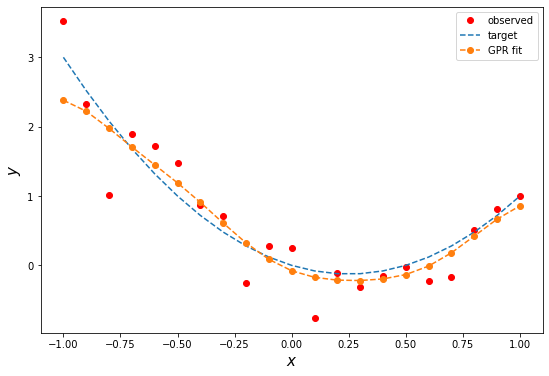

In [37]:
# plot
plt.figure(figsize=(9, 6))
plt.plot(x_is, y_is, 'ro', label='observed')
plt.plot(x_is, mu(x_is), ls='dashed', label='target')
plt.plot(x_is, yhat, 'o--', label='GPR fit')
plt.xlabel(r'$x$', fontsize=15)
plt.ylabel(r'$y$', fontsize=15)
plt.legend();

In [38]:
# posterior kernel
def kpo(x, xp):
    Sigma_YY_inv_Yxp = np.linalg.solve(Sigma_YY, k(xp, x_is))
    Sigma_xY = k(x, x_is)
    return k(x, xp) - sum(Sigma_xY*Sigma_YY_inv_Yxp)

In [39]:
# wrap everthing up as functions

# The posterior mean function from GPR
# inputs: 
# m: prior mean function 
# k: prior kernel
# y: observations
# x: indices
# 
# output: the posterior mean function

def pos_mean(m, k, y, x, sigma=0.001):
    n = len(x)
    
    # calculate the covariance matrices
    tmp, _ = np.meshgrid(x_is, x_is)
    Sigma_YY = k(tmp, _)
    Sigma_YY = Sigma_YY + sigma**2*np.identity(n)
    
    # determine Sigma_YY_inv(Y - EY) by solving the linear system Sigma_YY x = Y - EY
    Sigma_YY_inv_Y_EY = np.linalg.solve(Sigma_YY, y - m(x))
    
    # return the posterior mean function
    return lambda xx: m(xx) + sum(k(xx, x)*Sigma_YY_inv_Y_EY)


# The posterior kernel from GPR
# inputs: 
# k: prior kernel
# x: indices
# 
# output: the posterior kernel

def pos_kernel(k, x, sigma=0.1):
    n = len(x)
    
    # calculate the covariance matrices
    tmp, _ = np.meshgrid(x_is, x_is)
    Sigma_YY = k(tmp, _)
    Sigma_YY = Sigma_YY + sigma**2*np.identity(n)
    
    # return the posterior kernel
    def _(xx, xp):
        # determine Sigma_YY_inv Sigma_Yxp by solving the linear system Sigma_YY x = Sigma_Yxp
        Sigma_YY_inv_Yxp = np.linalg.solve(Sigma_YY, k(xp, x))
        Sigma_xY = k(xx, x)
        return k(xx, xp) - sum(Sigma_xY*Sigma_YY_inv_Yxp)
        
    return _

In [40]:
# an example of overfitting
mpo = pos_mean(m, k, y_is, x_is, sigma=0.001)
mpo = np.vectorize(mpo)
mpo(x_is)

array([ 3.54621538,  2.19815658,  1.28890099,  1.60897726,  1.85557559,
        1.50339612,  0.92003406,  0.41076722,  0.14251242,  0.11383494,
        0.00924226, -0.29950277, -0.45034976, -0.24524099, -0.036229  ,
       -0.11867752, -0.25938903, -0.07346743,  0.42936134,  0.85544179,
        0.99444426])

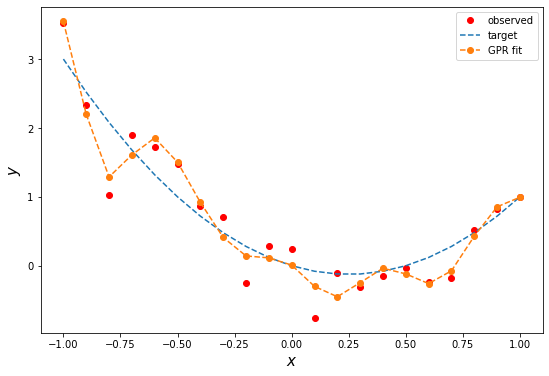

In [41]:
# plot
plt.figure(figsize=(9, 6))
plt.plot(x_is, y_is, 'ro', label='observed')
plt.plot(x_is, mu(x_is), ls='dashed', label='target')
plt.plot(x_is, mpo(x_is), 'o--', label='GPR fit')
plt.xlabel(r'$x$', fontsize=15)
plt.ylabel(r'$y$', fontsize=15)
plt.legend();

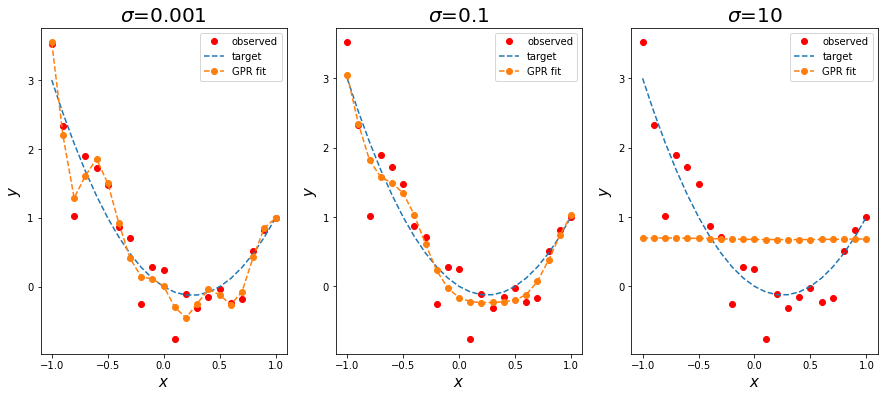

In [42]:
# effect of sigma
plt.figure(figsize=(15, 6))
sigmas = [0.001, 0.1, 10]
for i, sigma in zip(range(len(sigmas)), sigmas):
    mpo = pos_mean(m, k, y_is, x_is, sigma=sigma)
    mpo = np.vectorize(mpo)
    plt.subplot(1, 3, i+1)
    plt.plot(x_is, y_is, 'ro', label='observed')
    plt.plot(x_is, mu(x_is), ls='dashed', label='target')
    plt.plot(x_is, mpo(x_is), 'o--', label='GPR fit')
    plt.xlabel(r'$x$', fontsize=15)
    plt.ylabel(r'$y$', fontsize=15)
    plt.title(f'$\sigma$={sigma}', fontsize=20)
    plt.legend();

## Implied volatility surface from GPR

To apply GPR to construct implied volatility curve for a given fixed time to expiry, the observations $y_1, \cdots, y_n$ are the implied volatilities inferred from the market traded optios whereas the index $\bx$ is set as the logmoneyness, i.e., the logarithm of the ratio between strike and forward price. the authors of the  paper "Machine Learning for Quantitative Finance: Fast Derivative Pricing, Hedging and Fitting" by Spiegeleer, Madan, Reyners, and Schoutens, chose the radial basis function  

$$
k(x, y) = A e^{-\frac{|x-y|^2}{2\ell^2}}
$$

as the prior kernel, where $A$ and $\ell$ are hyperparameters, and a quadratic function as the prior mean function.

#### Note 
- There is no guarantee that the GPR interpolated/extrapolated implied volatility surface would be free of arbitrage.
- Nonconvexity of call price as a function of strike indicates the existence of butterfly spread arbitrage and nonmonotonicity indicates bull spread arbitrage. 

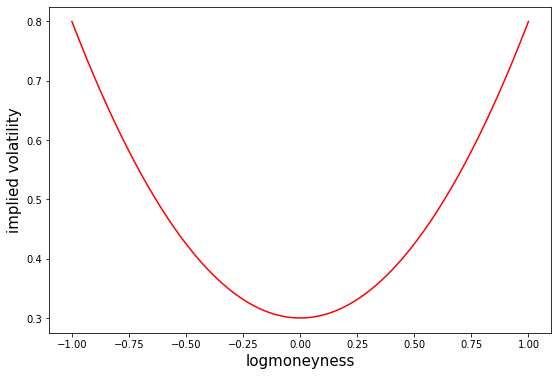

In [12]:
# for example, consider a parabolic implied volatility curve in logmoneyness
# k = logmoneyness
a, b, c = 0.5, 0, 0.3
sig_imp = lambda k: a*k**2 + b*k + c

s = 10
ks = np.linspace(-1, 1, 201)
ivs = sig_imp(ks)

# plot the implied vol curve
plt.figure(figsize=(9, 6))
plt.plot(ks, ivs, color='red')
plt.xlabel('logmoneyness', fontsize=15)
plt.ylabel('implied volatility', fontsize=15);

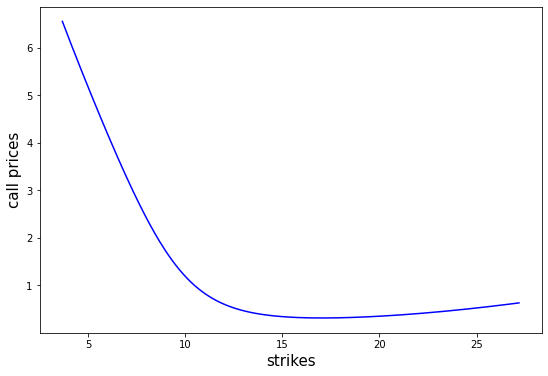

In [13]:
# plot the call prices vs strikes
Ks = s*exp(ks)
cs = bs_call(s=s, K=Ks, sigma=ivs, t=1)['c']
plt.figure(figsize=(9, 6))
plt.plot(Ks, cs, color='blue')
plt.xlabel('strikes', fontsize=15)
plt.ylabel('call prices', fontsize=15);

## Resolutions to smile

Approaches to resolve the skew/smile problem
- Local volatility model
    - Assume the volatility is a function of the underlying asset and time.
    - Market is complete.
    - Volatility function is recoverable from the market data (Dupire formula) - easy to calibrate.
    - Dupire (diffusion model), Derman-Kani(Markov chain model)

- Stochastic volatility model
    - Assume the volatility itself follows another stochastic process.
    - Incomplete market.
    - Volatility of volatility is unobservable
    - Heston's model, SABR model, Hull-White model, etc.
    - Fractional volatility models

- Jump diffusion models (e.g. Merton jump diffusion), exponential Levy models (e.g. CGMY), etc.


## Local volatility model

The local volatility model assumes that the evolution of the price $S_t$ of the underlying under risk neutral probability (with zero interest rate) is governed by the SDE
$$
\frac{dS_t}{S_t} =  \sigma_\ell (S_t,t) dW_t.
$$

$\sigma_\ell$ is referred to as the *local volatility function*. In other words, rather than taking the volatility as a constant as in the Black-Scholes model, the local volatility model allows the volatility to depend on, and only on, the underlying price $s$ and time $t$.

The associated pricing equation for the local volatility model (assume interest rate $r=0$) is given by

$$
\frac{\p u}{\p t} + \frac{\sigma_\ell^2(s,t)}{2}s^2\frac{\p^2 u}{\p s^2} = 0.
$$

In addition to being a complete market, one fascinating feature of the local volatility model is that the local volatility function $\sigma_\ell$ ideally can be read off from the marekt data of vanilla calls by applying the Dupire's formula

$$
\sigma^2_\ell(K,T) = \frac{\frac{\p C}{\p T}}{\frac12 K^2 \frac{\p^2 C}{\p K^2}}
$$

should one observe the premia of calls for all strikes $K$ and expiries $T$. In practice, we have far less observed data; a method of interpolating/extrapolating the lacking call premia is required to determine the local volatility function $\sigma_\ell$.  


## Example - Bachelier model

The Bachelier model can be regarded as a local volatility model with the local volatility function given by $\sigma_\ell(s) = \frac{\sigma}s$. Hence, the model reads

$$
dS_t = \sigma dW_t \quad \Longleftrightarrow \quad S_t = S_0 + \sigma W_t.
$$

In other words, the price of the underlying evolves as a (shifted and rescaled) Brownian motion. The associated pricing equation in the Bachelier model reads 

$$
\frac{\p u}{\p t} + \frac{\sigma^2}{2} \frac{\p^2 u}{\p s^2} = 0,
$$

which is the classcial (backward) heat equation, and the premium $c$ of call struck at $K$ with time-to-expiry $\tau$ is given by 

$$
c = \frac{\sigma\sqrt\tau}{\sqrt{2\pi}} \, e^{-\frac{(s - K)^2}{2\sigma^2\tau}} + (s - K) \, N\left(\frac{s - K}{\sigma\sqrt\tau}\right).
$$


## Louis Bachelier

<h2><img src="https://upload.wikimedia.org/wikipedia/commons/3/3b/LouisBachelier.jpg" align = "center" width=160></h2> 
<br>
Courtesy: Photo from Wikipedia
<br>

Quotes from the [Wikipage](https://en.wikipedia.org/wiki/Louis_Bachelier)

>Louis Jean-Baptiste Alphonse Bachelier (French: [baʃəlje]; March 11, 1870 – April 28, 1946) was a French mathematician at the turn of the 20th century. He is credited with being the first person to model the stochastic process now called Brownian motion, as part of his PhD thesis The Theory of Speculation (Théorie de la spéculation, published 1900).

>Bachelier’s Doctoral thesis, which introduced for the first time a mathematical model of Brownian motion and its use for valuing stock options, is historically the first paper to use advanced mathematics in the study of finance. Thus, Bachelier is considered as the forefather of mathematical finance and a pioneer in the study of stochastic processes. 

## Example - CEV model

The constant elasticity of variance (CEV) model is a local volatility model with the local volatility function given by a power function in the price of the underlying. Specifically, the CEV model reads

$$
\frac{dS_t}{S_t} = \alpha S_t^\beta dW_t
$$

with $\alpha > 0$ and $\beta > -1$. The associated pricing equation in the CEV model reads 

$$
\frac{\p u}{\p t} + \frac{\alpha^2}2 s^{2 + 2\beta} \frac{\p^2 u}{\p s^2} = 0.
$$

### Note
- $\beta = -1$ is the Bachelier model.
- $\beta < 0$ corresponds to leverage effect which is usually observed in equity markets.
- $\beta > 0$ corresponds to reverse leverage effect often observed in commodity markets


## Stochastic volatility model

Stochastic volatility models impose that the volatility (or equivalently the variance) *per se* is a stochastic process which may or may not be correlated to the driving Brownian motion of the underlying. A generic stochastic volatility model is of the form

\begin{eqnarray*}
&& \frac{dS_t}{S_t} = \sqrt{v_t} \, dW_t, \\
&& d v_t = a(t, v_t) dt + b(t, v_t) \, dZ_t,
\end{eqnarray*}

where $W_t$ and $Z_t$ are correlated Brownian motions with correlation $\rho$. The process $v_t$ is usually referred to as the *instantaneous variance* and its square root $\sigma_t := \sqrt{v_t}$ the *instantaneous volatility* of the underlying at time $t$.

Commonly used stochastic volatility models include 
- Heston model
- Hull-White model
- Stochastic alpha-beta-rho (SABR) model

### Note
- Incomplete market. 
- Instantaneous volatility process is latent. 
- Conditions on the functions $a$ and $b$ are required for the positivity of $v_t$.

## Numerical and approximate solutions

As opposed to Black-Scholes model, local volatility and stochastic volatility models generally admit no closed form expressions for vanilla options as simple as the Black-Scholes formula. One is required to resort to numerical or approximate solutions as practical applications are concerned. Commonly used methodologies include

- Monte Carlo simulation
    - Less sensitive to dimensionality
    - More flexible for additional extra features for pricing problems
    - Usually slower than numerical PDE though improved efficient schemes exist

- Numerical PDE solver
    - Faster than simulation but still slow for calibration
    - More involved and technical in mathematics than Monte Carlo

- Asymptotic expansions
    - Approximate solution, not exact
    - Fast enough for calibration
    - Solution is up to an order of a small parameter, but in closed form


## Example - the Heston model

The dynamic of Heston's model under risk neutral probability with zero interest rate reads

\begin{eqnarray*}
&& \frac{d S_t}{S_t} = \sqrt{v_t}dB_t,  \\
&& d v_t = \lambda(m - v_t)dt + \eta \sqrt{v_t} dZ_t, \\
&& \mathbb{E}[dB_t dZ_t] = \rho dt.
\end{eqnarray*}

The pricing equation in Heston's model reads

$$
\frac{\p u}{\p t} + \frac{s^2 v}{2}\frac{\p^2 u}{\p s^2} + \rho \eta s v \frac{\p^2 u}{\p s \p v} +  \frac{\eta^2 v}{2}\frac{\p^2 u}{\p v^2} + \lambda(m - v) \frac{\p u}{\p v} = 0
$$

and the premium $c$ of a call struck at $K$ has the following quasi-closed form (modulo a one-dimensional integral) expression

$$
c = K \,\left\{ e^x \,P_1(x,v,\tau ) - P_0(x ,v ,\tau)\right\},
$$ 

where $x = \log s - \log K$ and

$$
    P_j (x,v,\tau ) =\frac{1}{2} + \frac{1}{\pi }\,\int_0^\infty \,\mathop{Re} \left\{ {\frac{{\exp \{ C_j (u,\tau )\,\bar v + D_j(u,\tau )\,v + i\,u\,x\} }}{{i\,u}}} \right\} \, du, \quad j = 0,1.
$$



### Note
- The condition on the coefficients $2\lambda m \geq \eta^2$ guarantees that the variance process $v_t$ never hit zero. In practice, the condition is at times not met. 
- Technical note: call premium from characteristic function

$$
c = S - \frac{\sqrt{SK}}\pi \, \int_0^\infty Re\left\{ e^{-iuk} \phi\left(u - \frac i2 \right) \right\} \frac{du}{u^2 + \frac14},
$$

where $\phi$ is the characteristic function of $\log(S_T/S_0)$, $k = \log(K/S_0)$ denotes the logmoneyness, and $i = \sqrt{-1}$. 

In [14]:
# numerical integration in python
from scipy.integrate import quad

In [15]:
f = lambda x: np.sin(x)
quad(f, a=0, b=np.pi)

(2.0, 2.220446049250313e-14)

In [16]:
# complex number in python
1j*2j, (3+2j).real, (5+7j).imag

((-2+0j), 3.0, 7.0)

In [17]:
# Heston characteristic function
def phi_heston(lmda, rho, eta, vbar, v):
    def _(u, t):
        al = -u*u/2 - 1j*u/2
        bet = lmda - rho*eta*1j*u
        gam = eta**2/2
        d = sqrt(bet*bet - 4*al*gam)
        rp = (bet + d)/(2*gam)
        rm = (bet - d)/(2*gam)
        g = rm/rp
        D = rm*(1 - exp(-d*t))/ (1 - g*exp(-d*t))
        C = lmda * (rm * t - 2/eta**2 * log( (1 - g*exp(-(d*t)))/(1 - g) ) )
        return exp(C*vbar + D*v)
    return _

In [18]:
# call price from chf 
def call_option(phi, k, t):
    integrand = lambda u: (exp(-1j*u*k)*phi(u - 1j/2, t)/(u**2 + 1/4)).real
    tmp = quad(integrand, a=0, b=np.inf)[0]
    return 1 - exp(k/2)/np.pi*tmp

In [19]:
# parameters for Heston model
lmda, rho, eta, vbar, v = 0.6067, -0.7571, 0.2928, 0.0707, .0654
call_option(phi_heston(lmda, rho, eta, vbar, v), 0, 1)

0.09701405804263008

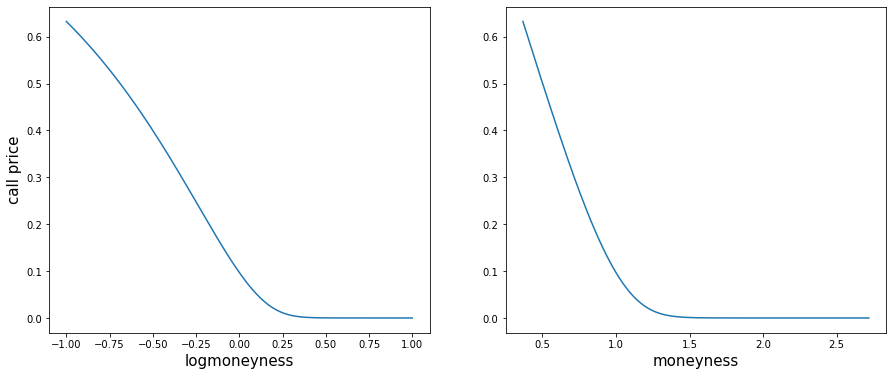

In [20]:
# plot
x = np.linspace(-1, 1, 201)
_ = lambda xx: call_option(phi_heston(lmda, rho, eta, vbar, v), xx, 1)
_ = np.vectorize(_)
y = _(x)

plt.figure(figsize=(15, 6))
plt.subplot(1, 2, 1)
plt.plot(x, y)
plt.xlabel('logmoneyness', fontsize=15)
plt.ylabel('call price', fontsize=15)
plt.subplot(1, 2, 2)
plt.plot(exp(x), y)
plt.xlabel('moneyness', fontsize=15);

## Heston model in log return

Denote by $X_t = \log S_t - \log S_0$ the logarithmic return. Then the Heston model can be recast as

\begin{eqnarray*}
&& dX_t = \sqrt{v_t} \, dB_t - \frac12 v_t dt, \\
&& d v_t = \lambda(m - v_t) dt + \eta \sqrt{v_t} \, dZ_t,
\end{eqnarray*}

where $B_t = \rho Z_t + \bar\rho W_t$ and $W_t$, $Z_t$ are independent Brownian motions. $\bar\rho = \sqrt{1 - \rho^2}$. 

## Joint characteristic function for log return and integrated variance

We are interested in determining the joint characteristic function for the logarithmic return $X_T$ and the integrated variance $\int_0^T v_t dt$. Namely,  

$$
\Eof{e^{iu_1 X_T + iu_2 \int_0^T v_t dt}},
$$

where $u_1, u_2 \in \R$ are parameters. 

Notice that we have 

\begin{eqnarray*}
X_T &=& X_t + \rho \int_t^T \sqrt{v_\tau} dZ_\tau + \bar\rho \int_t^T \sqrt{v_\tau} dW_\tau - \frac12 \int_t^T v_\tau d\tau  \\
&=& X_t + \frac\rho\eta \left\{v_T - v_t - \int_t^T \lambda(m - v_\tau) d\tau \right\} + \bar\rho \int_t^T \sqrt{v_\tau} dW_\tau - \frac12 \int_t^T v_\tau d\tau \\
&=& X_t - \frac\rho\eta \{v_t + \lambda m (T - t)\} + \frac\rho\eta v_T + \int_t^T \left(\frac{\lambda\rho}\eta - \frac12\right) v_\tau d\tau + \bar\rho \int_t^T \sqrt{v_\tau} dW_\tau 
\end{eqnarray*}


Thus, 

\begin{eqnarray*}
&& \Eof{\left. e^{iu_1 X_T + iu_2\int_t^T v_\tau d\tau} \right|X_t=x, v_t=v} \\
&=& \Eof{\left. e^{iu_1 \left\{ X_t - \frac\rho\eta \{v_t + \lambda m (T - t)\} + \frac\rho\eta v_T + \int_t^T \left(\frac{\lambda\rho}\eta - \frac12\right) v_\tau d\tau + \bar\rho \int_t^T \sqrt{v_\tau} dW_\tau \right\} + iu_2\int_t^T v_\tau d\tau} \right| v_t=v} \\
&=& e^{iu_1\left(x - \frac\rho\eta \{v + \lambda m (T - t)\}\right)}\Eof{\left. e^{iu_1 \left\{\frac\rho\eta v_T + \int_t^T \left(\frac{\lambda\rho}\eta - \frac12\right) v_\tau d\tau + \bar\rho \int_t^T \sqrt{v_\tau} dW_\tau \right\} + iu_2\int_t^T v_\tau d\tau} \right|v_t=v} \\
&=& e^{iu_1\left(x - \frac\rho\eta \{v + \lambda m (T - t)\}\right)}\Eof{\left. e^{iu_1 \left\{\frac\rho\eta v_T + \int_t^T \left(\frac{\lambda\rho}\eta - \frac12 + \frac{\bar\rho^2}2 \right) v_\tau d\tau \right\} + iu_2\int_t^T v_\tau d\tau} \right|v_t=v} \\
&=& e^{iu_1\left(x - \frac\rho\eta \{v + \lambda m (T - t)\}\right)}\Eof{\left. e^{ iu_1\frac\rho\eta v_T + \int_t^T \left\{iu_1 \left(\frac{\lambda\rho}\eta - \frac{\rho^2}2 \right) + iu_2 \right\} v_\tau d\tau} \right|v_t=v}
\end{eqnarray*}

## Feynman-Kac formula again

We proceed by applying the Feynman-Kac formula to evaluate the expectation.

Let 

$$
u(t, v) = \Eof{\left. e^{ c_1 v_T - \int_t^T c_2 v_\tau d\tau} \right|v_t=v},
$$

where $c_1 = iu_1\frac\rho\eta$ and $c_2 = -i\left\{u_1\left(\frac{\lambda\rho}\eta - \frac{\rho^2}2\right) + u_2\right\}$. Then $u$ is a solution to the (backward) PDE

\begin{eqnarray*}
u_t + \frac{\eta^2 v}2 u_{vv} + \lambda(m - v) u_v  = c_2 v u
\end{eqnarray*}

with terminal condition $u(T, v) = e^{c_1 v}$.

## Solving the terminal value problem

Assume the ansatz of exponential affine

$$
u(t, v) = e^{H_1 v + H_0}.
$$

The derivatives of $u$ are given by

\begin{eqnarray*}
&& u_t = (\dot H_1 v + \dot H_0) u, \\
&& u_v = H_1 u, \\
&& u_{vv} = H_1^2 u.
\end{eqnarray*}

Substuting the derivatives into the PDE yields 

$$
\dot H_1 v + \dot H_0 + \frac{\eta^2}2 v H_1^2 + \lambda(m - v) H_1 = c_2 v. 
$$

Compare the coefficients then we obtain the system of ODEs for $H_1$ and $H_0$

\begin{eqnarray*}
v &:& \dot H_1 + \frac{\eta^2}2 H_1^2 - \lambda H_1 = c_2, \\
1 &:& \dot H_0 + \lambda m H_1 = 0
\end{eqnarray*}

with terminal conditions $H_1(T) = c_1$ and $H_0(T) = 0$.

## Solution to system of ODEs
The solution to the ODEs is given (formally) by 

\begin{eqnarray*}
H_1(t) &=& \frac{\lambda}{\eta^2} + \frac{\Delta}{\eta^2}  \tan \left(\arctan\left\{\frac{c_1 \eta^2 - \lambda}{\Delta}\right\} + \frac\Delta2 (T-t) \right), \\
H_0(t) &=& \frac{2\lambda m}{\eta^2} \log \left(\cos \left\{\arctan\left(\frac{c_1 \eta^2 - \lambda}\Delta\right)\right\}\right) \\
&& - \frac{2\lambda m}{\eta^2} \log \left(\cos \left\{ \frac\Delta2 (t-T) - \arctan \left(\frac{c_1 \eta ^2-\lambda }\Delta\right)\right\}\right) 
+ \frac{\lambda^2 m}{\eta^2}(T-t)
\end{eqnarray*}

where $\Delta = \sqrt{-2 c_2 \eta^2 - \lambda^2}$.

#### Note
Note that some of the parameters are complex, it causes some troubles when evaluating  logarithm etc. 

Thus, we can obtain the characteristic function for $X_T$ by simply setting $u_2 = 0$.